Prep work:

*   Download student datasets from I-Learn
*   Rename files to team8-module5-predictions.csv where team8 is the name of the team
*   Make sure file is one column and remove any extra columns
*   Make sure the heading is predictions
*   Upload datasets to session storage area.
*   Upload module5-holdout-answers.csv found in the Canvas module (DO NOT SHARE THIS FILE)
*   Run the notebook






In [82]:
# MODULE 05 - SIGNS HOLDOUT GRADING

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

level_for_top_score = .91
level_for_bottom_score = .79

# READ IN THE CSV FILES
team_dir = Path("./")
teams = team_dir.glob("*-predictions.csv")
team_list = []
for team in teams:
  # print(latent_file)
  team_list.append((str(team).split("-",1)[0],team))

# print(team_list)

In [83]:
# READ IN THE HOLDOUT ANSWERS
targets_file = "module5-holdout-answers.csv"
targets = pd.read_csv(targets_file)
# targets

In [84]:
# ARE THE STUDENT DATASETS THE CORRECT LENGTH
student_datasets = {}
for (group, file) in team_list:
  ds = pd.read_csv(file)
  
  if ds.shape != targets.shape:
    print(f"Error group {group} ds had {ds.shape} rows and columns instead of the expected {targets.shape}. It will be excluded.")
  else:
    student_datasets[group] = ds
    print(f"Group {group} added successfully")

Group team1 added successfully


In [85]:
# student_datasets

In [86]:
def recommended_grade(amount):
  '''
  A simple min max scaler to identify a recommended score for the holdout set
  '''
  min_allowed = level_for_bottom_score
  max_allowed = level_for_top_score
  if amount>max_allowed:
    return 100
  elif amount<min_allowed:
    return 0
  else:
    return (amount - min_allowed) / (max_allowed - min_allowed)*100
    

In [87]:
results_dict = {}

target_names = ['Speed_20', 'Speed_30', 'Speed_50', 'Speed_60', 'Speed_70',
               'Speed_80','Speed_Limit_Ends', 'Speed_100', 'Speed_120', 'Overtaking_Prohibited',
               'Overtakeing_Prohibited_Trucks', 'Crossroad_Ahead', 'Priority_Road_Ahead', 'Yield', 'STOP',
               'Entry_Forbidden', 'Trucks_Forbidden', 'No_Entry(one-way traffic)', 'Cars_Prohibited(!)', 'Left_Curve_Ahead',
               'Right_Curve_Ahead', 'Bends_Left_Then_Right', 'Poor_Surface_Ahead', 'Slippery_Surface_Ahead', 'Road_Narrows_On_Right',
               'Roadwork_Ahead', 'Traffic_Light_Ahead', 'Warning_Pedestrians', 'Warning_Children', 'Warning_Bikes',
               'Uncontrolled_Crossroad', 'Deer_Crossing', 'End_Previous_Limitation', 'Turning_Right_Compulsory', 'Turning_Left_Compulsory',
               'Ahead_Only', 'Straight_Or_Right_Mandatory', 'Straight_Or_Left_Mandatory', 'Passing_Right_Compulsory', 'Passing_Left_Compulsory',
               'Roundabout', 'End_Overtaking_Prohibition', 'End_Overtaking_Prohibition_Trucks']
# print('Classification Report')
# print(classification_report(student_ds, targets, target_names=target_names))

In [88]:
for group, student_ds in student_datasets.items():
  student_dict = {}
  cm = confusion_matrix(student_ds, targets)
  # print(classification_report(student_ds,targets,target_names=target_names))
  # # print(group,cm)
  # student_dict["Incorrect Calls"] = cm[1][0]
  # student_dict["Correct Calls"] = cm[1][1]
  # student_dict["Value of Calls"] = value_of_calls(cm[1][0],cm[1][1])
  
  student_dict['classification_report'] = classification_report(student_ds, targets,target_names=target_names)
  student_dict['dictionary'] = classification_report(student_ds, targets,output_dict=True)
  student_dict['accuracy'] = student_dict['dictionary']['accuracy']
  student_dict['macro_f1'] = student_dict['dictionary']['macro avg']['f1-score']
  student_dict["Grade"] = recommended_grade(student_dict['macro_f1'])
  student_dict['incorrect'] = (1-student_dict['accuracy'])*12630
  results_dict[group] = student_dict
  # print(cm)
# print(student_dict)

In [89]:
# results_dict

In [90]:
results_df = pd.DataFrame(results_dict)
results_ds_trans = results_df.transpose()
results_ds_trans = results_ds_trans.drop(columns=["Grade","classification_report","dictionary"])
results_ds_trans = results_ds_trans.round(2)
results_ds_trans = results_ds_trans.sort_values(by="macro_f1",ascending=False)
# results_ds_trans.to_csv("class_results.csv")
results_ds_trans

,accuracy,incorrect,macro_f1
team1,0.860253,1765,0.824884


In [91]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for group, team_results in results_dict.items():
  # print(team_results)
  testfinal = team_results
  # print(team_results['dataset'])
  # print(f"R-Squared Value: {r2}")
  print(f"-------------------------------- {group.upper()} RESULTS ---------------------------------\n")
  print(f" Macro F1: {team_results['macro_f1']}\n",
  f"Accuracy: {team_results['accuracy']}\n",
  f"Classification Report:\n{team_results['classification_report']}\n",
  f"Total Images Incorrect: {team_results['incorrect']:.0f}")

  # color_dict = dict({'below 20%':'tab:blue',
  #                   'above 20%': 'tab:orange'})
  # # print(testfinal['abspercentmiss'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95]))
  # # xlims=(0,1e3)
  # # ylims=(0,1e3)
  # ax = sns.scatterplot(data=testfinal,x='actual',y='predictions',hue="percent_bucket",palette=color_dict)
  # # ax.set(xscale="log", yscale="log", xlim=xlims, ylim=ylims)
  # ax.plot(xlims,xlims, color='r')
  # # plt.legend(labels=['perfect',"below 5",'above 5','10-20%','above 20'])  
  # plt.show()
  print(f"-"*77)
  print("\n"*3)

-------------------------------- TEAM1 RESULTS ---------------------------------

 Macro F1: 0.8248839666688571
 Accuracy: 0.8602533650039589
 Classification Report:
                                   precision    recall  f1-score   support

                         Speed_20       0.75      0.70      0.73        64
                         Speed_30       0.93      0.83      0.88       807
                         Speed_50       0.98      0.76      0.85       968
                         Speed_60       0.69      0.79      0.73       392
                         Speed_70       0.93      0.86      0.89       718
                         Speed_80       0.82      0.82      0.82       634
                 Speed_Limit_Ends       0.73      0.98      0.84       112
                        Speed_100       0.63      0.95      0.76       299
                        Speed_120       0.82      0.77      0.79       479
            Overtaking_Prohibited       0.93      0.82      0.87       547
    Over

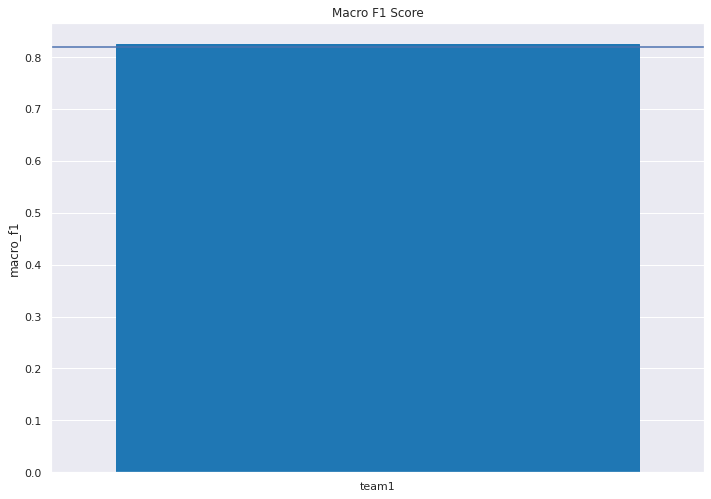

,accuracy,incorrect,macro_f1
team1,0.860253,1765,0.824884


In [92]:
# GENERATE GRAPHICS FOR TEAMS 
# THESE CAN BE SHARED WITH THE STUDENTS

graph = sns.barplot(data=results_ds_trans,y="macro_f1",x=results_ds_trans.index)
graph.set_title("Macro F1 Score")
graph.axhline(level_for_top_score)
for bar in graph.patches:
    if bar.get_height() > level_for_top_score:
        bar.set_color('tab:blue') 
    elif bar.get_height() <0:
      bar.set_color('tab:red')         
    elif bar.get_height() < level_for_bottom_score:
      bar.set_color('tab:orange')  
    else:
        bar.set_color('tab:grey')
#The plot is shown
plt.show()
results_ds_trans

In [93]:
results_df = pd.DataFrame(results_dict)
results_ds_trans = results_df.transpose()
results_ds_trans = results_ds_trans.drop(columns=["classification_report","dictionary"])
results_ds_trans = results_ds_trans.round(2)
results_ds_trans = results_ds_trans.sort_values(by="Grade",ascending=False)
# results_ds_trans.to_csv("class_results.csv")
results_ds_trans

,Grade,accuracy,incorrect,macro_f1
team1,100,0.860253,1765,0.824884
